In [29]:
import os
import re
import time
import torch
import torch.nn as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import net.model


torch.manual_seed(1)

In [2]:
class LSTM(nn.Module):
    def __init__(self, element_dim, hidden_dim, output_size, num_layers=2):
        super().__init__()
        self.element_dim = element_dim

        self.hidden_dim = hidden_dim

        self.num_layers = num_layers

        #self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers)

        self.rnn = nn.GRU(element_dim, hidden_dim, num_layers)

        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, sentence):
        lstm_out, _ = self.rnn(sentence.view(len(sentence), 1, -1))
        out = self.fc(lstm_out.view(len(sentence), -1))
        return out
    

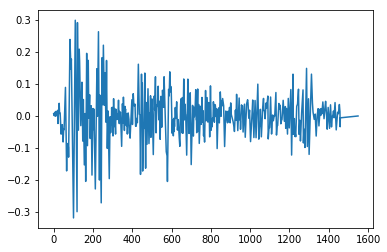

torch.Size([1550, 1])


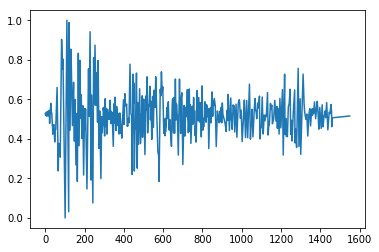

In [49]:

import utils.load_acc

earthquake = utils.load_acc.get_earthquake_data()[:]

plt.plot(earthquake)

plt.show()

#data = torch.tensor(utils.load_acc.task()).to(torch.float32)
#data = (data.T)[5:7].reshape(len(data), -1)
#data = torch.rand(101, element_dim)
data = torch.tensor(earthquake).reshape(len(earthquake), 1).to(torch.float32)
#print(data.shape)

from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()

data = torch.tensor(s.fit_transform(data)).to(torch.float32)

print(data.shape)

plt.plot(data)
plt.show()

epoch:  0 current_loss:  1.1411850641161436
epoch:  1 current_loss:  0.1918668370017258
epoch:  2 current_loss:  0.18884728425109643
epoch:  3 current_loss:  0.1810349326879077
epoch:  4 current_loss:  0.17907767388533102
epoch:  5 current_loss:  0.17626982907813726
epoch:  6 current_loss:  0.1683785083469047
epoch:  7 current_loss:  0.15852550522595266
epoch:  8 current_loss:  0.15746502060301282
epoch:  9 current_loss:  0.15478056182200817
epoch:  10 current_loss:  0.15036215679083398
epoch:  11 current_loss:  0.14960127794756772
epoch:  12 current_loss:  0.1493591422558893
epoch:  13 current_loss:  0.15018153183882532
epoch:  14 current_loss:  0.15105015103472397
epoch:  15 current_loss:  0.1489291881407553
epoch:  16 current_loss:  0.1625011110554624
epoch:  17 current_loss:  0.1764694937260174
epoch:  18 current_loss:  0.15290665615611942
epoch:  19 current_loss:  0.17240616271556064


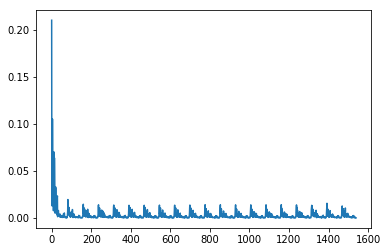

In [56]:
"""
Super para : 
    lr = 0.05;
    hidden_dim = 10
    epoch = 20
    max_length = 20
    clip_threh = 5
"""
def pretty_time(time, degree=1):
    return str(int(time // 60)) + "m" + str(round(time % 60, degree)) if time > 60 else round(time, degree)

element_dim = data.shape[-1]

net = LSTM(element_dim=element_dim, hidden_dim=10, output_size=element_dim)

#from net.model import FesNet
#net = FesNet(element_dim=element_dim, nhead=1, num_layers=6)

criterion =  nn.MSELoss()

optimizer = optim.Adam(net.parameters(), lr=0.05)

start_time = time.time()

loss_list = []

max_length = 20

length = len(data)

for epoch in range(20):
    i = 0
    current_loss = 0
    while i + max_length < len(data):
        
        inputs, targets = data[i:i+max_length], data[i+1:i+1+max_length]

        #inputs, targets = torch.unsqueeze(inputs, dim=1), torch.unsqueeze(targets, dim=1)
        
        #predicts = net(inputs, targets)
        
        predicts = net(inputs)

        net.zero_grad()
        
        loss = criterion(predicts, targets)

        loss.backward()

        torch.nn.utils.clip_grad_norm_(net.parameters(), 0.5)

        optimizer.step()

        current_loss += loss.item()

        i += max_length

        loss_list.append(loss.item())
    
    print("epoch: ", epoch, "current_loss: ", current_loss)

plt.plot(loss_list)

plt.show()


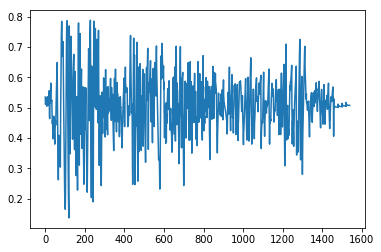

In [57]:
pre = torch.tensor([])
i = 0
while i + max_length < len(data):
    inputs, targets = data[i:i+max_length], data[i+1:i+1+max_length]

    #inputs, targets = torch.unsqueeze(inputs, dim=1), torch.unsqueeze(targets, dim=1)

    #predicts = net(inputs, targets).reshape(max_length, -1)
    
    predicts = net(inputs).reshape(max_length, -1)

    pre = torch.cat((pre, predicts))

    i += max_length

pre = pre.detach().numpy()

plt.plot(pre)

plt.show()

In [45]:
plt.plot((pre.T)[7])
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 1

In [41]:
plt.plot((data.T)[7])
plt.show()

IndexError: index 7 is out of bounds for dimension 0 with size 1

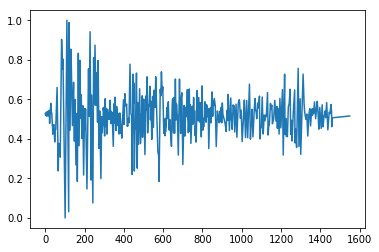

In [46]:
plt.plot(data)
plt.show()